This notebook applies machine learning modeling techniques. The following have been analyzed:

1. Clustering methods have been applied to predict country labels based on the other variables 
2. Classification techniques have been applied to predict if a beer will have a rating above or below 4

## Import Python Packages

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Import Data

In [2]:
df = pd.read_csv('FinalData.csv')

In [3]:
df.head()

,Unnamed: 0,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
#Get beers from the top 15 countries
total_beers = df.groupby('Country').Country.count()
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df[df.Country == c])


In [6]:
data = top_15

In [7]:
data = data.drop(['BeerStyle','BreweryType','City','State','Name','has_twitter','has_facebook'], axis=1)

## K-Means Clustering

In [8]:
f1 = data.ABV.values
f2 = data.AverageRating.values
f3 = data.RatingCount.values
f4 = data.SocialMedia.values
X = np.array(list(zip(f1,f2,f3,f4)))

In [9]:
model = KMeans(n_clusters=15)

In [10]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
labels = model.predict(X)

In [12]:
abv = X[:,0]
avgrating = X[:,1]
ratcount = X[:,2]

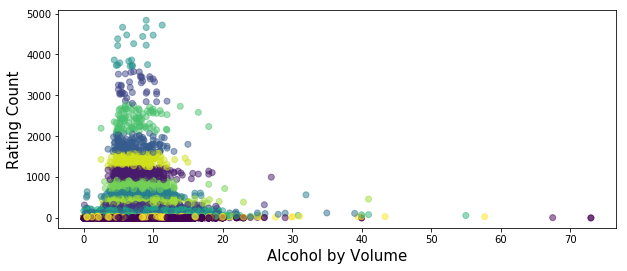

In [13]:
plt.figure(figsize=(10,4))
plt.scatter(abv,ratcount,c=labels,alpha=0.5)
plt.xlabel('Alcohol by Volume', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

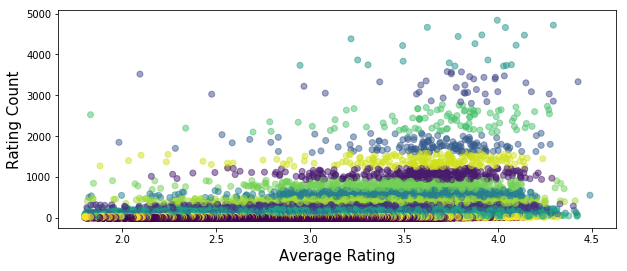

In [14]:
plt.figure(figsize=(10,4))
plt.scatter(avgrating,ratcount,c=labels,alpha=0.5)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

In [15]:
print (model.inertia_)

34767389.6998


The inertia is too high, which indicates that the labels are spread wide apart. We will do an inertia plot with different clusters.

In [16]:
df_model = pd.DataFrame({'labels':labels,'country':data.Country})

In [17]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [18]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,2060,9739,2003,3986,14783,2009,2063,7405,3115,2349,2748,2060,2055,3270,59103
1,49,4,1,10,17,0,0,25,6,4,1,9,1,1,176
2,192,50,22,126,131,4,18,99,42,27,29,56,14,31,1071
3,10,2,0,0,3,0,0,4,1,0,0,0,0,0,17
4,21,3,0,1,5,0,1,12,3,1,0,4,0,0,84
5,445,319,114,623,614,56,69,422,302,128,245,149,79,246,3018
6,101,15,2,30,40,0,3,45,19,11,6,19,1,5,450
7,8,0,1,0,2,0,0,1,0,0,0,0,0,0,9
8,311,129,53,265,263,13,35,169,124,50,89,126,24,87,1700


In [19]:
#run K-means with different number of clusters to get the inertia plot
#ks = [15,25,35,45,55,65,75]
#inertias =[]

#for k in ks:
 #   model = KMeans(n_clusters=k)
 #   model.fit(X)
 #   inertias.append(model.inertia_)

In [20]:
#plt.plot(ks,inertias,'-o')
#plt.xlabel('number of clusters, k', size=10)
#plt.ylabel('inertia',size=10)
#plt.title('K-means Inertia Plot', size =10)
#plt.xticks(ks)
#plt.show()

The inertias are still very high even for 45 clusters. 

In [21]:
model_45 = KMeans(n_clusters=45)

In [22]:
model_45.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=45, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
labels_45 = model_45.predict(X)

In [24]:
df_model = pd.DataFrame({'labels':labels_45,'country':data.Country})

In [25]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [26]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,751,3663,721,1491,5071,740,617,2369,1174,916,970,792,790,1214,19914
1,43,11,1,17,14,0,1,20,7,4,4,6,0,3,197
2,5,0,0,0,1,0,0,4,1,0,0,0,0,0,22
3,112,36,20,69,82,3,10,47,39,14,26,33,6,24,460
4,2,1,0,0,2,0,0,3,0,0,0,0,0,0,8
5,16,0,0,1,4,0,0,11,2,1,0,2,0,0,59
6,269,395,81,571,672,119,95,454,285,152,250,134,81,260,2345
7,72,18,5,23,34,0,7,23,11,5,5,12,4,9,312
8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2


## Hierachical Clustering - All Beers

We will apply hierachical clustering for the top 1000 beers since this clustering method is good only for a small data set.

In [98]:
#get the top 1000 beers from the data frame
top1000 = df[0:1000]

In [100]:
# drop the unwanted columns
top1000 = top1000.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [102]:
#get dummies for the BeerStyle and BreweryType categorical variables 
colreq = ['BeerStyle','BreweryType']
for col in colreq:
    dummies = pd.get_dummies(top1000[col],prefix=col)
    top1000 = top1000.join(dummies)

In [106]:
#drop the unwanted columns once more
top1000 = top1000.drop(['BeerStyle','BreweryType'],axis=1)

In [109]:
#get the arrays for clustering 
X1000 = top1000.drop('Country',axis=1).values
y1000 = top1000.Country.values

In [110]:
mergings = linkage(X1000,method='complete')

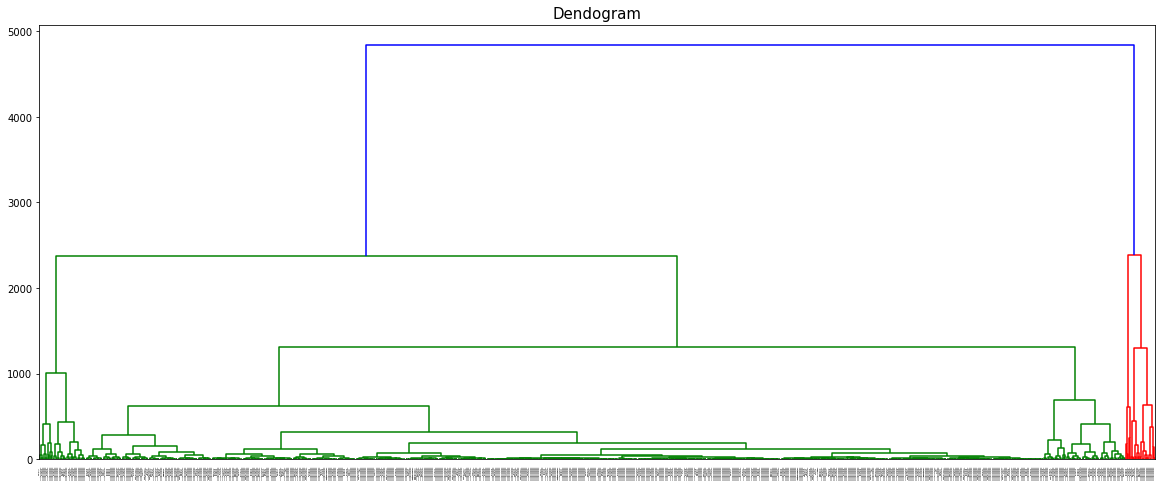

In [112]:
plt.figure(figsize=(20,8))
dendrogram(mergings,
           labels=y1000,
           leaf_rotation=90,
           leaf_font_size=2,)
plt.title('Dendogram', size=15)
plt.show()

In [113]:
labels1000 = fcluster(mergings,500,criterion='distance')

In [115]:
df1000 = pd.DataFrame({'labels': labels1000, 'country': y1000})

In [116]:
ct = pd.crosstab(df1000['labels'],df1000['country'])

In [117]:
ct

country,Australia,Belgium,Canada,Denmark,England,Estonia,Germany,Ireland,Italy,Netherlands,New Zealand,Norway,Poland,Romania,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,,,,
1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,0,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,21
3,0,14,4,6,3,0,0,0,0,5,0,4,2,0,2,0,4,69
4,2,53,21,28,19,2,1,1,5,24,0,8,6,1,8,4,19,544
5,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14
6,0,11,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,37
7,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,4


Both the Kmeans and hierachical clustering perform poorly on predicting the country labels. We will treat the problem as a classification problem in the subsequent sections. 

## KNN Classfier - US Beers

We will apply the KNN method on beers only from the United States. We will also create a new target variable - 0 for average rating less than 0 and 1 for average rating greater than 4.

In [41]:
df_us = df[df.Country == 'United States']

In [42]:
df_us.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1
6,Goose Island Bourbon County Stout - Rare 2010,13.000000,4.410718,417.0,Imperial Stout,Commercial Brewery,Chicago,Illinois,United States,1,1,1
7,Toppling Goliath Mornin’ Delight,12.000000,4.405847,186.0,Imperial Stout,Microbrewery,Decorah,Iowa,United States,1,1,1


In [43]:
df_us = df_us.drop(['Name','City','State','has_twitter','has_facebook','BreweryType','Country'],axis=1)

In [44]:
df_us['Target'] = np.where(df_us.AverageRating < 4,0,1)

In [45]:
df_us.head()

,ABV,AverageRating,RatingCount,BeerStyle,SocialMedia,Target
2,14.000000,4.423655,77.0,Mead,1,1
3,14.000000,4.421873,50.0,Mead,1,1
4,3.979168,4.420719,46.0,Berliner Weisse,1,1
6,13.000000,4.410718,417.0,Imperial Stout,1,1
7,12.000000,4.405847,186.0,Imperial Stout,1,1


In [46]:
#we can now drop the average rating column
df_us = df_us.drop(['AverageRating'],axis=1)

In [47]:
#we will create dummy variables for the beer_styles column 
style_dummies = pd.get_dummies(df_us.BeerStyle,prefix='style')

In [48]:
df_us = df_us.join(style_dummies)

In [49]:
df_us.head()

,ABV,RatingCount,BeerStyle,SocialMedia,Target,style_Abbey Dubbel,style_Abbey Tripel,style_Abt/Quadrupel,style_Altbier,style_Amber Ale,...,style_Sour/Wild Ale,style_Specialty Grain,style_Spice/Herb/Vegetable,style_Stout,style_Sweet Stout,style_Traditional Ale,style_Weizen Bock,style_Wheat Ale,style_Witbier,style_Zwickel/Keller/Landbier
2,14.000000,77.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.000000,50.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.979168,46.0,Berliner Weisse,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.000000,417.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12.000000,186.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values

In [51]:
y = df_us.Target.values

In [52]:
#split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [53]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [54]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [55]:
print (knn.score(X_test,y_test))

0.993124031886


In [56]:
y_pred = knn.predict(X_test)

In [57]:
print(confusion_matrix(y_test, y_pred))

[[26287     6]
 [  176     0]]


In [58]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26293
          1       0.00      0.00      0.00       176

avg / total       0.99      0.99      0.99     26469



## Logisitic Regression - US Beers

We will apply logisitc regression to see how it compares to the KNN model when predicting if a beer rating is below or above 4. 

In [59]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values
y = df_us.Target.values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [61]:
logreg = LogisticRegression()

In [62]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
y_pred = logreg.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26289
          1       0.47      0.04      0.08       180

avg / total       0.99      0.99      0.99     26469



In [65]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

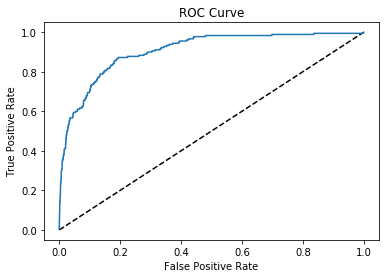

In [67]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [68]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9065894691907472


The logistic regression model is good in prediciting if a beer will have a rating above or below 4 and is comparable to the KNN neighbors model. We will apply the logistic regression to the entire dataset.

## Logisitic Regression - All Beers

In [69]:
data = df

In [70]:
data.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [71]:
data = data.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [72]:
data.head()

,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,Country,SocialMedia
0,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Sweden,0
1,10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0
2,14.000000,4.423655,77.0,Mead,Meadery,United States,1
3,14.000000,4.421873,50.0,Mead,Meadery,United States,1
4,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,United States,1


In [73]:
#create target variable
data['Target'] = np.where(data.AverageRating < 4,0,1)

In [74]:
#drop the average rating
data = data.drop(['AverageRating'],axis=1)

In [75]:
data.head()

,ABV,RatingCount,BeerStyle,BreweryType,Country,SocialMedia,Target
0,9.500000,557.0,Imperial Stout,Microbrewery,Sweden,0,1
1,10.200000,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0,1
2,14.000000,77.0,Mead,Meadery,United States,1,1
3,14.000000,50.0,Mead,Meadery,United States,1,1
4,3.979168,46.0,Berliner Weisse,Microbrewery,United States,1,1


In [76]:
#create dummy variables for the BeerStyle, BreweryType and Country Columns
cols = ['BeerStyle','BreweryType','Country']
for col in cols:
    dummies = pd.get_dummies(data[col],prefix=col)
    data = data.join(dummies)

In [77]:
#create X and Y arrays for model 
X = data.drop(['BeerStyle','BreweryType','Country','Target'],axis=1).values
y = data.Target.values

In [78]:
#create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [79]:
logreg = LogisticRegression()

In [80]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
y_pred = logreg.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     65744
          1       0.44      0.03      0.06       256

avg / total       0.99      1.00      0.99     66000



In [83]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

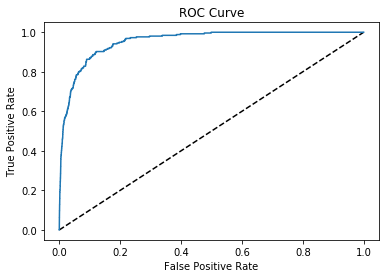

In [85]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [86]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9551187655907762


The model performs well in predicting whether the beer will have a rating above or below 4. 